<a href="https://colab.research.google.com/github/thendralbala/ML_from_scratch/blob/main/Clustering_data_using_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Unsupervised Learning
Clustering
euclidean distance
K-Means algoruthm for clustering


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn import model_selection


In [ ]:
def load_data(input_file):
    X = []
    with open(input_file, 'r') as f:
        for line in f.readlines():
            data = [float(x) for x in line.split(',')]
            X.append(data)

    return np.array(X)

In [ ]:
# Plot the classifier boundaries on input data
def plot_classifier(classifier, X, y, title='Classifier boundaries', annotate=False):
    # define ranges to plot the figure
    x_min, x_max = min(X[:, 0]) - 1.0, max(X[:, 0]) + 1.0
    y_min, y_max = min(X[:, 1]) - 1.0, max(X[:, 1]) + 1.0

    # denotes the step size that will be used in the mesh grid
    step_size = 0.01

    # define the mesh grid
    x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), np.arange(y_min, y_max, step_size))

    # compute the classifier output
    mesh_output = classifier.predict(np.c_[x_values.ravel(), y_values.ravel()])

    # reshape the array
    mesh_output = mesh_output.reshape(x_values.shape)

    # Plot the output using a colored plot
    plt.figure()

    # Set the title
    plt.title(title)

    # choose a color scheme you can find all the options
    # here: http://matplotlib.org/examples/color/colormaps_reference.html
    plt.pcolormesh(x_values, y_values, mesh_output, cmap=plt.cm.Set1)

    # Overlay the training points on the plot
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=2, cmap=plt.cm.Set1)

    # specify the boundaries of the figure
    plt.xlim(x_values.min(), x_values.max())
    plt.ylim(y_values.min(), y_values.max())

    # specify the ticks on the X and Y axes
    plt.xticks(())
    plt.yticks(())

    if annotate:
        for x, y in zip(X[:, 0], X[:, 1]):
            # Full documentation of the function available here:
            # http://matplotlib.org/api/text_api.html#matplotlib.text.Annotation
            plt.annotate(
                '(' + str(round(x, 1)) + ',' + str(round(y, 1)) + ')',
                xy = (x, y), xytext = (-15, 15),
                textcoords = 'offset points',
                horizontalalignment = 'right',
                verticalalignment = 'bottom',
                bbox = dict(boxstyle = 'round,pad=0.6', fc = 'white', alpha = 0.8),
                arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=0'))

In [ ]:
# Print performance metrics
def print_accuracy_report(classifier, X, y, num_validations=5):
    accuracy = model_selection.cross_val_score(classifier,
            X, y, scoring='accuracy', cv=num_validations)
    print("Accuracy: " + str(round(100*accuracy.mean(), 2)) + "%")

    f1 = model_selection.cross_val_score(classifier,
            X, y, scoring='f1_weighted', cv=num_validations)
    print("F1: " + str(round(100*f1.mean(), 2)) + "%")

    precision = model_selection.cross_val_score(classifier,
            X, y, scoring='precision_weighted', cv=num_validations)
    print("Precision: " + str(round(100*precision.mean(), 2)) + "%")

    recall = model_selection.cross_val_score(classifier,
            X, y, scoring='recall_weighted', cv=num_validations)
    print("Recall: " + str(round(100*recall.mean(), 2)) + "%")

In [ ]:
data = load_data('data_multivar.txt')
num_clusters = 4

([], [])

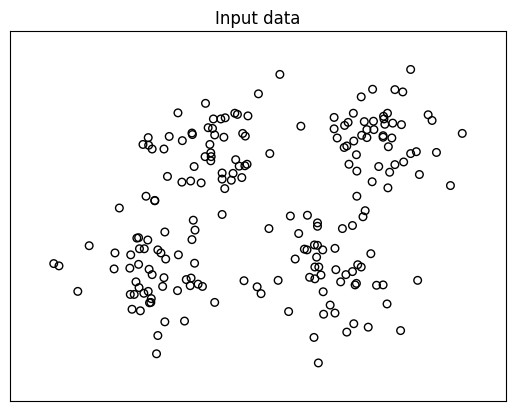

In [ ]:
plt.figure()
plt.scatter(data[:,0], data[:,1],marker = 'o', facecolors = 'none', edgecolors = 'k', s = 30)
x_min, x_max = data[:,0].min() - 1, data[:,0].max() + 1
y_min, y_max = data[:,1].min() - 1, data[:,1].max() + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())